<a href="https://colab.research.google.com/github/MohammedTamim/Image-Recognition-System-AI/blob/main/Image_Recognization_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 1

In [4]:
pip install -q kaggle


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdtamimrawoot","key":"857e46462395a258d97a71b6c270a194"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [9]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) - y_train shape: (60000,)


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"train reshaped: {x_train.shape} ")

train reshaped: (60000, 28, 28, 1) 


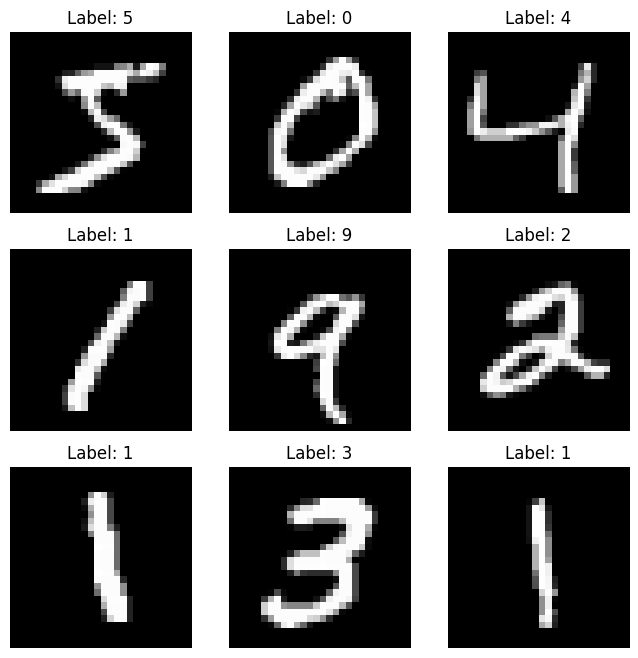

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis("off")
plt.show()

In [12]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


 DAY 2

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.9020 - loss: 0.3165 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9840 - loss: 0.0489 - val_accuracy: 0.9880 - val_loss: 0.0404
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9878 - val_loss: 0.0436
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9910 - val_loss: 0.0354


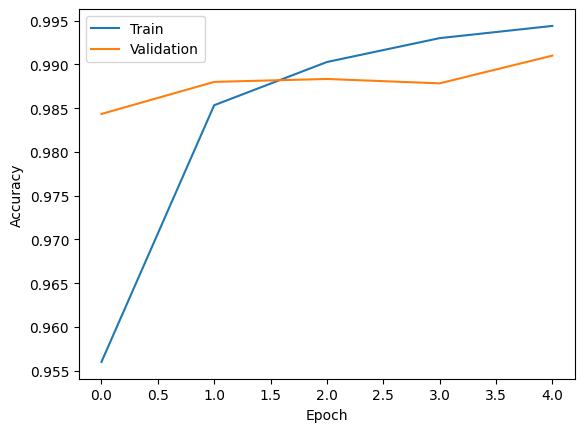

In [15]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9890 - loss: 0.0372
Test accuracy: 0.9912
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [17]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

DAY 3

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train_c10)

In [19]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 80ms/step - accuracy: 0.3497 - loss: 1.7690 - val_accuracy: 0.5137 - val_loss: 1.3453
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.5346 - loss: 1.3051 - val_accuracy: 0.5975 - val_loss: 1.1473
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 81ms/step - accuracy: 0.5973 - loss: 1.1553 - val_accuracy: 0.5278 - val_loss: 1.4181
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6234 - loss: 1.0857 - val_accuracy: 0.6778 - val_loss: 0.9345
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6398 - loss: 1.0394 - val_accuracy: 0.6605 - val_loss: 0.9996
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6511 - loss: 1.0101 - val_accuracy: 0.6246 - val_loss: 1.0770
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6611 - loss: 0.9792 - val_accuracy: 0.6813 - val_loss: 0.9214
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.6729 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.82      0.83      0.82      1000
           2       0.60      0.63      0.61      1000
           3       0.54      0.56      0.55      1000
           4       0.71      0.63      0.66      1000
           5       0.74      0.54      0.63      1000
           6       0.82      0.74      0.78      1000
           7       0.70      0.81      0.75      1000
           8       0.88      0.71      0.78      1000
           9       0.61      0.90      0.73      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



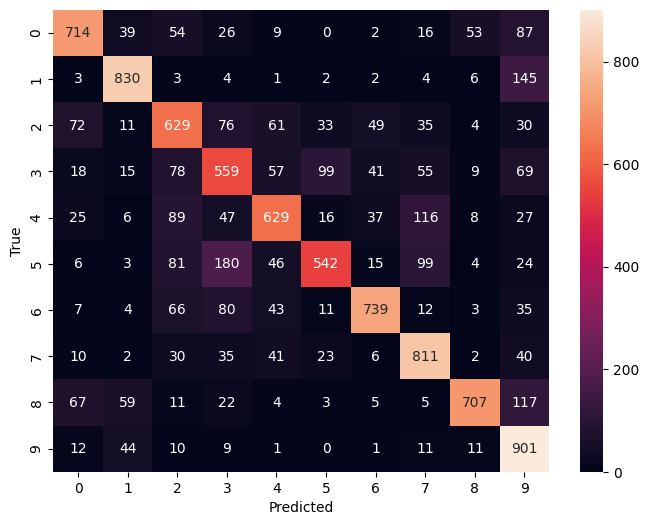

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

DAY 4

In [21]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 94% 204M/218M [00:00<00:00, 377MB/s] 
100% 218M/218M [00:00<00:00, 376MB/s]


In [22]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.7830 - loss: 0.5477 - val_accuracy: 0.7985 - val_loss: 0.5130
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.7961 - loss: 0.5012 - val_accuracy: 0.7985 - val_loss: 0.5173
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.7932 - loss: 0.4906 - val_accuracy: 0.7985 - val_loss: 0.5187
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.8061 - loss: 0.4630 - val_accuracy: 0.7746 - val_loss: 0.5585
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.8078 - loss: 0.4444 - val_accuracy: 0.7935 - val_loss: 0.5292


In [27]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
              )
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1664s 6s/step - accuracy: 0.7952 - loss: 0.4894 - val_accuracy: 0.7920 - val_loss: 0.5329
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1643s 7s/step - accuracy: 0.8019 - loss: 0.4472 - val_accuracy: 0.7920 - val_loss: 0.5354
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1620s 6s/step - accuracy: 0.8003 - loss: 0.4205 - val_accuracy: 0.7900 - val_loss: 0.5428


In [28]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step


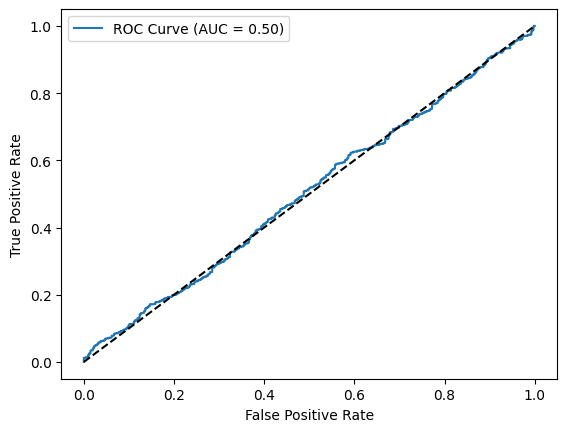

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

DAY 5

In [32]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpeg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpeg to download (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: Dog


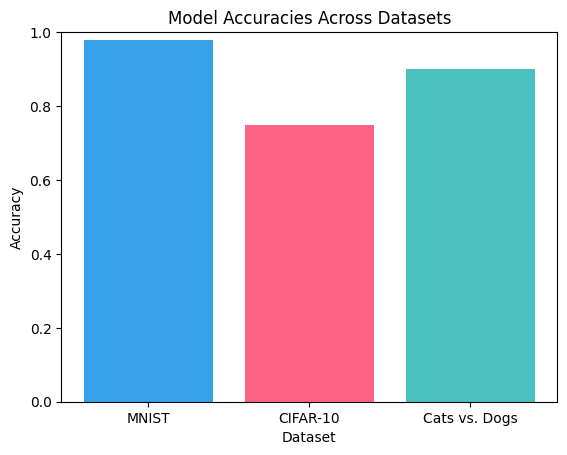

In [31]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()